# Analysis from ENADE microdata for 2018

## Import libs

In [1]:
import pandas as pd
from apyori import apriori

## Read microdata file

In [2]:
data = pd.read_csv('../microdata/microdata-enade-2018.csv', sep=';', encoding='ISO-8859-1', low_memory=False)
data

,nu_ano_enade,co_ies,no_ies,sg_ies,co_mantenedora_ies,no_mantenedora_ies,tp_categoria_administrativa_ies,no_categoria_administrativa_ies,tp_organizacao_academica_ies,no_organizacao_academica_ies,...,q72,q73,q74,q75,q76,q77,q78,q79,q80,q81
0,2018,699,FUNDAÇÃO UNIVERSIDADE FEDERAL DE RONDÔNIA,UNIR,15587.0,FUNDACAO UNIVERSIDADE FEDERAL DE RONDONIA,1.0,Pública Federal,1.0,Universidade,...,9,9,9,9,9,9,9,9,9,9
1,2018,699,FUNDAÇÃO UNIVERSIDADE FEDERAL DE RONDÔNIA,UNIR,15587.0,FUNDACAO UNIVERSIDADE FEDERAL DE RONDONIA,1.0,Pública Federal,1.0,Universidade,...,9,9,9,9,9,9,9,9,9,9
2,2018,699,FUNDAÇÃO UNIVERSIDADE FEDERAL DE RONDÔNIA,UNIR,15587.0,FUNDACAO UNIVERSIDADE FEDERAL DE RONDONIA,1.0,Pública Federal,1.0,Universidade,...,9,9,9,9,9,9,9,9,9,9
3,2018,699,FUNDAÇÃO UNIVERSIDADE FEDERAL DE RONDÔNIA,UNIR,15587.0,FUNDACAO UNIVERSIDADE FEDERAL DE RONDONIA,1.0,Pública Federal,1.0,Universidade,...,9,9,9,9,9,9,9,9,9,9
4,2018,699,FUNDAÇÃO UNIVERSIDADE FEDERAL DE RONDÔNIA,UNIR,15587.0,FUNDACAO UNIVERSIDADE FEDERAL DE RONDONIA,1.0,Pública Federal,1.0,Universidade,...,9,9,9,9,9,9,9,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548122,2018,16628,Faculdade ANASPS,FANASPS,15496.0,ASSOCIACAO NACIONAL DOS SERVIDORES DA PREVIDEN...,5.0,Privada sem fins lucrativos,3.0,Faculdade,...,9,9,9,9,9,9,9,9,9,9
548123,2018,16628,Faculdade ANASPS,FANASPS,15496.0,ASSOCIACAO NACIONAL DOS SERVIDORES DA PREVIDEN...,5.0,Privada sem fins lucrativos,3.0,Faculdade,...,9,9,9,9,9,9,9,9,9,9
548124,2018,16628,Faculdade ANASPS,FANASPS,15496.0,ASSOCIACAO NACIONAL DOS SERVIDORES DA PREVIDEN...,5.0,Privada sem fins lucrativos,3.0,Faculdade,...,9,9,9,9,9,9,9,9,9,9
548125,2018,16628,Faculdade ANASPS,FANASPS,15496.0,ASSOCIACAO NACIONAL DOS SERVIDORES DA PREVIDEN...,5.0,Privada sem fins lucrativos,3.0,Faculdade,...,9,9,9,9,9,9,9,9,9,9


## Select only columns of interest

In [3]:
interest_columns = [
    'no_categoria_administrativa_ies',
    'no_organizacao_academica_ies',
    'no_regiao_ies',
    'no_grau_academico',
    'no_modalidade',
    'faixa_etaria',
    'tp_sexo',
    'no_pres',
    'nt_ger',
    'q1', # Estado civil
    'q2', # Cor ou raça
    'q4', # Escolaridade do pai
    'q5', # Escolaridade da mãe
    'q8', # Renda total da família
    'q9', # Situação financeira
    'q10', # Situação de trabalho
    'q15', # Entrou por alguma política afirmativa?
    'q17', # Em que tipo de escola cursou o EM?
    'q21', # Alguém da família concluiu ensino superior?
    'q58', # Docentes utilizaram TICs como estratégia de ensino?
]

interest_data = data[interest_columns]

interest_data.head()

,no_categoria_administrativa_ies,no_organizacao_academica_ies,no_regiao_ies,no_grau_academico,no_modalidade,faixa_etaria,tp_sexo,no_pres,nt_ger,q1,q2,q4,q5,q8,q9,q10,q15,q17,q21,q58
0,Pública Federal,Universidade,Norte,Bacharelado,EaD,8,F,Ausente,NaN,B,B,A,B,A,E,A,A,A,A,5
1,Pública Federal,Universidade,Norte,Bacharelado,EaD,6,M,Ausente,NaN,B,D,A,A,C,F,E,A,A,A,5
2,Pública Federal,Universidade,Norte,Bacharelado,EaD,7,F,Ausente,NaN,B,A,B,B,F,F,E,A,A,A,3
3,Pública Federal,Universidade,Norte,Bacharelado,EaD,7,F,Ausente,NaN,B,D,A,B,C,F,E,A,A,A,5
4,Pública Federal,Universidade,Norte,Bacharelado,EaD,8,F,Ausente,NaN,B,D,B,C,F,E,D,A,D,A,5


### Check count for valid values

In [4]:
interest_data.count()

no_categoria_administrativa_ies    547464
no_organizacao_academica_ies       547464
no_regiao_ies                      547464
no_grau_academico                  547020
no_modalidade                      548127
faixa_etaria                       548127
tp_sexo                            548127
no_pres                            548127
nt_ger                             462232
q1                                 548127
q2                                 548127
q4                                 548127
q5                                 548127
q8                                 548127
q9                                 548127
q10                                548127
q15                                548127
q17                                548127
q21                                548127
q58                                548127
dtype: int64

## Translate some columns to better readability

In [5]:
%run '../scripts/attribute-dictionary.py'

interest_data = interest_data.replace(dictionary_params)

interest_data['nt_ger'] = interest_data['nt_ger'].str.replace(',', '.')
interest_data["NOTA_GERAL"] = pd.to_numeric(interest_data["nt_ger"], errors='coerce')

interest_data.head()

,no_categoria_administrativa_ies,no_organizacao_academica_ies,no_regiao_ies,no_grau_academico,no_modalidade,faixa_etaria,tp_sexo,no_pres,nt_ger,q1,...,q4,q5,q8,q9,q10,q15,q17,q21,q58,NOTA_GERAL
0,Pública Federal,Universidade,Norte,Bacharelado,EaD,Entre 42 e 49 anos,Feminino,Ausente,NaN,Casado(a),...,Pai: Nenhuma escolaridade,Mãe: Ensino Fundamental I,Classe Social E,Tenho renda e contribuo com o sustento da família,Não estou trabalhando,Não entrei por cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo,NaN
1,Pública Federal,Universidade,Norte,Bacharelado,EaD,Entre 34 e 41 anos,Masculino,Ausente,NaN,Casado(a),...,Pai: Nenhuma escolaridade,Mãe: Nenhuma escolaridade,Classe Social C,Sou o principal responsável pelo sustento da f...,Trabalho 40 horas semanais ou mais,Não entrei por cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo,NaN
2,Pública Federal,Universidade,Norte,Bacharelado,EaD,Entre 34 e 41 anos,Feminino,Ausente,NaN,Casado(a),...,Pai: Ensino Fundamental I,Mãe: Ensino Fundamental I,Classe Social B,Sou o principal responsável pelo sustento da f...,Trabalho 40 horas semanais ou mais,Não entrei por cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Discordo parcialmente,NaN
3,Pública Federal,Universidade,Norte,Bacharelado,EaD,Entre 34 e 41 anos,Feminino,Ausente,NaN,Casado(a),...,Pai: Nenhuma escolaridade,Mãe: Ensino Fundamental I,Classe Social C,Sou o principal responsável pelo sustento da f...,Trabalho 40 horas semanais ou mais,Não entrei por cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo,NaN
4,Pública Federal,Universidade,Norte,Bacharelado,EaD,Entre 42 e 49 anos,Feminino,Ausente,NaN,Casado(a),...,Pai: Ensino Fundamental I,Mãe: Ensino Fundamental II,Classe Social B,Tenho renda e contribuo com o sustento da família,Trabalho de 21 a 39 horas semanais,Não entrei por cotas,EM: A maior parte em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo,NaN


## Remove nil values and filter by relevant data

In [6]:
interest_data = interest_data.query("no_categoria_administrativa_ies.notnull() and no_organizacao_academica_ies.notnull() and no_regiao_ies.notnull() and no_grau_academico.notnull() and no_modalidade.notnull() and faixa_etaria.notnull() and tp_sexo.notnull() and no_pres.notnull() and nt_ger.notnull() and q1.notnull() and q2.notnull() and q4.notnull() and q5.notnull() and q8.notnull() and q9.notnull() and q10.notnull() and q15.notnull() and q17.notnull() and q21.notnull() and q58.notnull() and no_pres == 'Presente com resultado válido'")
interest_data = interest_data.query("no_categoria_administrativa_ies != '*' and no_organizacao_academica_ies != '*' and no_regiao_ies != '*' and no_grau_academico != '*' and no_modalidade != '*' and faixa_etaria != '*' and tp_sexo != '*' and no_pres != '*' and nt_ger != '*' and q1 != '*' and q2 != '*' and q4 != '*' and q5 != '*' and q8 != '*' and q9 != '*' and q10 != '*' and q15 != '*' and q17 != '*' and q21 != '*' and q58 != '*'")

interest_data.head()

,no_categoria_administrativa_ies,no_organizacao_academica_ies,no_regiao_ies,no_grau_academico,no_modalidade,faixa_etaria,tp_sexo,no_pres,nt_ger,q1,...,q4,q5,q8,q9,q10,q15,q17,q21,q58,NOTA_GERAL
85883,Pública Federal,Universidade,Norte,Bacharelado,EaD,Entre 26 e 33 anos,Feminino,Presente com resultado válido,26.6,Casado(a),...,Pai: Ensino Fundamental I,Mãe: Ensino Fundamental I,Classe Social C,Tenho renda e contribuo com o sustento da família,Trabalho 40 horas semanais ou mais,Não entrei por cotas,EM: Todo em escola pública,Não tenho familiar com graduação,IE Usou TICs: Concordo totalmente,26.6
85884,Pública Federal,Universidade,Norte,Bacharelado,EaD,Entre 26 e 33 anos,Feminino,Presente com resultado válido,51,Estado Civil: Outro,...,Pai: Nenhuma escolaridade,Mãe: Ensino Fundamental II,Classe Social D,Tenho renda e contribuo com o sustento da família,Trabalho 40 horas semanais ou mais,Não entrei por cotas,EM: Todo em escola pública,Não tenho familiar com graduação,IE Usou TICs: Concordo totalmente,51.0
85885,Pública Federal,Universidade,Norte,Bacharelado,EaD,Entre 26 e 33 anos,Masculino,Presente com resultado válido,32.5,Casado(a),...,Pai: Ensino Fundamental II,Mãe: Ensino Médio,Classe Social C,Tenho renda e contribuo com o sustento da família,Trabalho 40 horas semanais ou mais,Não entrei por cotas,EM: A maior parte em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo,32.5
85886,Pública Federal,Universidade,Norte,Bacharelado,EaD,Entre 26 e 33 anos,Feminino,Presente com resultado válido,29.3,Casado(a),...,Pai: Ensino Fundamental I,Mãe: Ensino Fundamental I,Classe Social C,"Sem renda, financiado por familiares ou outros",Não estou trabalhando,Entrei com cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo parcialmente,29.3
85887,Pública Federal,Universidade,Norte,Bacharelado,EaD,Entre 34 e 41 anos,Feminino,Presente com resultado válido,43.9,Estado Civil: Outro,...,Pai: Ensino Fundamental I,Mãe: Ensino Fundamental II,Classe Social D,"Tenho renda, recebo ajuda de familiares ou outros",Trabalho 40 horas semanais ou mais,Não entrei por cotas,EM: Todo em escola privada (particular),Tenho familiar com graduação,IE Usou TICs: Concordo totalmente,43.9


### Check count for valid values

In [7]:
interest_data.count()

no_categoria_administrativa_ies    445206
no_organizacao_academica_ies       445206
no_regiao_ies                      445206
no_grau_academico                  445206
no_modalidade                      445206
faixa_etaria                       445206
tp_sexo                            445206
no_pres                            445206
nt_ger                             445206
q1                                 445206
q2                                 445206
q4                                 445206
q5                                 445206
q8                                 445206
q9                                 445206
q10                                445206
q15                                445206
q17                                445206
q21                                445206
q58                                445206
NOTA_GERAL                         445206
dtype: int64

## Calculate Z-SCORE from NU_NOTA_GERAL

In [8]:
from scipy.stats import zscore

interest_data["Z_SCORE_NOTA"] = zscore(interest_data["NOTA_GERAL"])
interest_data.head()

,no_categoria_administrativa_ies,no_organizacao_academica_ies,no_regiao_ies,no_grau_academico,no_modalidade,faixa_etaria,tp_sexo,no_pres,nt_ger,q1,...,q5,q8,q9,q10,q15,q17,q21,q58,NOTA_GERAL,Z_SCORE_NOTA
85883,Pública Federal,Universidade,Norte,Bacharelado,EaD,Entre 26 e 33 anos,Feminino,Presente com resultado válido,26.6,Casado(a),...,Mãe: Ensino Fundamental I,Classe Social C,Tenho renda e contribuo com o sustento da família,Trabalho 40 horas semanais ou mais,Não entrei por cotas,EM: Todo em escola pública,Não tenho familiar com graduação,IE Usou TICs: Concordo totalmente,26.6,-1.067117
85884,Pública Federal,Universidade,Norte,Bacharelado,EaD,Entre 26 e 33 anos,Feminino,Presente com resultado válido,51,Estado Civil: Outro,...,Mãe: Ensino Fundamental II,Classe Social D,Tenho renda e contribuo com o sustento da família,Trabalho 40 horas semanais ou mais,Não entrei por cotas,EM: Todo em escola pública,Não tenho familiar com graduação,IE Usou TICs: Concordo totalmente,51.0,0.630840
85885,Pública Federal,Universidade,Norte,Bacharelado,EaD,Entre 26 e 33 anos,Masculino,Presente com resultado válido,32.5,Casado(a),...,Mãe: Ensino Médio,Classe Social C,Tenho renda e contribuo com o sustento da família,Trabalho 40 horas semanais ou mais,Não entrei por cotas,EM: A maior parte em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo,32.5,-0.656545
85886,Pública Federal,Universidade,Norte,Bacharelado,EaD,Entre 26 e 33 anos,Feminino,Presente com resultado válido,29.3,Casado(a),...,Mãe: Ensino Fundamental I,Classe Social C,"Sem renda, financiado por familiares ou outros",Não estou trabalhando,Entrei com cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo parcialmente,29.3,-0.879228
85887,Pública Federal,Universidade,Norte,Bacharelado,EaD,Entre 34 e 41 anos,Feminino,Presente com resultado válido,43.9,Estado Civil: Outro,...,Mãe: Ensino Fundamental II,Classe Social D,"Tenho renda, recebo ajuda de familiares ou outros",Trabalho 40 horas semanais ou mais,Não entrei por cotas,EM: Todo em escola privada (particular),Tenho familiar com graduação,IE Usou TICs: Concordo totalmente,43.9,0.136763


### Z-SCORE mínimo

In [9]:
interest_data["Z_SCORE_NOTA"].min()

-2.918168423645369

### Z-SCORE máximo

In [10]:
interest_data["Z_SCORE_NOTA"].max()

3.602265328404444

## Create a label for grade based on z-score

In [11]:
NOTA_GERAL_LABELS = [
  "NOTA: MUITO ABAIXO DA MÉDIA",
  "NOTA: ABAIXO DA MÉDIA",
  "NOTA: MÉDIA",
  "NOTA: ACIMA DA MÉDIA",
  "NOTA: MUITO ACIMA DA MÉDIA",
]

interest_data["CLASSIFICACAO_NOTA"] = pd.cut(interest_data["Z_SCORE_NOTA"], bins=[-10, -2, -1, 1, 2, 10], labels=NOTA_GERAL_LABELS)

interest_data.head()

,no_categoria_administrativa_ies,no_organizacao_academica_ies,no_regiao_ies,no_grau_academico,no_modalidade,faixa_etaria,tp_sexo,no_pres,nt_ger,q1,...,q8,q9,q10,q15,q17,q21,q58,NOTA_GERAL,Z_SCORE_NOTA,CLASSIFICACAO_NOTA
85883,Pública Federal,Universidade,Norte,Bacharelado,EaD,Entre 26 e 33 anos,Feminino,Presente com resultado válido,26.6,Casado(a),...,Classe Social C,Tenho renda e contribuo com o sustento da família,Trabalho 40 horas semanais ou mais,Não entrei por cotas,EM: Todo em escola pública,Não tenho familiar com graduação,IE Usou TICs: Concordo totalmente,26.6,-1.067117,NOTA: ABAIXO DA MÉDIA
85884,Pública Federal,Universidade,Norte,Bacharelado,EaD,Entre 26 e 33 anos,Feminino,Presente com resultado válido,51,Estado Civil: Outro,...,Classe Social D,Tenho renda e contribuo com o sustento da família,Trabalho 40 horas semanais ou mais,Não entrei por cotas,EM: Todo em escola pública,Não tenho familiar com graduação,IE Usou TICs: Concordo totalmente,51.0,0.630840,NOTA: MÉDIA
85885,Pública Federal,Universidade,Norte,Bacharelado,EaD,Entre 26 e 33 anos,Masculino,Presente com resultado válido,32.5,Casado(a),...,Classe Social C,Tenho renda e contribuo com o sustento da família,Trabalho 40 horas semanais ou mais,Não entrei por cotas,EM: A maior parte em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo,32.5,-0.656545,NOTA: MÉDIA
85886,Pública Federal,Universidade,Norte,Bacharelado,EaD,Entre 26 e 33 anos,Feminino,Presente com resultado válido,29.3,Casado(a),...,Classe Social C,"Sem renda, financiado por familiares ou outros",Não estou trabalhando,Entrei com cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo parcialmente,29.3,-0.879228,NOTA: MÉDIA
85887,Pública Federal,Universidade,Norte,Bacharelado,EaD,Entre 34 e 41 anos,Feminino,Presente com resultado válido,43.9,Estado Civil: Outro,...,Classe Social D,"Tenho renda, recebo ajuda de familiares ou outros",Trabalho 40 horas semanais ou mais,Não entrei por cotas,EM: Todo em escola privada (particular),Tenho familiar com graduação,IE Usou TICs: Concordo totalmente,43.9,0.136763,NOTA: MÉDIA


## Check for uniqueness of all values to check if all of them was translated

In [12]:
interest_data['no_categoria_administrativa_ies'].unique()

array(['Pública Federal', 'Privada com fins lucrativos',
       'Pública Estadual', 'Privada sem fins lucrativos',
       'Pública Municipal', 'Especial'], dtype=object)

In [13]:
interest_data['no_organizacao_academica_ies'].unique()

array(['Universidade', 'Centro Universitário',
       'Instituto Federal de Educação, Ciência e Tecnologia', 'Faculdade',
       'Centro Federal de Educação Tecnológica'], dtype=object)

In [14]:
interest_data['no_regiao_ies'].unique()

array(['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro_Oeste'],
      dtype=object)

In [15]:
interest_data['no_grau_academico'].unique()

array(['Bacharelado', 'Tecnológico', 'Licenciatura'], dtype=object)

In [16]:
interest_data['no_modalidade'].unique()

array(['EaD', 'Presencial'], dtype=object)

In [17]:
interest_data['faixa_etaria'].unique()

array(['Entre 26 e 33 anos', 'Entre 34 e 41 anos', 'Entre 42 e 49 anos',
       'Entre 50 e 57 anos', 'Entre 17 e 25 anos', 'Entre 58 e 65 anos',
       'Acima de 65 anos', 'Até 17 anos'], dtype=object)

In [18]:
interest_data['tp_sexo'].unique()

array(['Feminino', 'Masculino'], dtype=object)

In [19]:
interest_data['no_pres'].unique()

array(['Presente com resultado válido'], dtype=object)

In [20]:
interest_data['q1'].unique()

array(['Casado(a)', 'Estado Civil: Outro', 'Solteiro(a)', 'Separado(a)',
       'Viúvo(a)'], dtype=object)

In [21]:
interest_data['q2'].unique()

array(['Parda', 'Preta', 'Branca', 'Raça/Cor não declarada', 'Amarela',
       'Indígena'], dtype=object)

In [22]:
interest_data['q4'].unique()

array(['Pai: Ensino Fundamental I', 'Pai: Nenhuma escolaridade',
       'Pai: Ensino Fundamental II', 'Pai: Ensino Superior - Graduação',
       'Pai: Ensino Médio', 'Pai: Pós-graduação'], dtype=object)

In [23]:
interest_data['q5'].unique()

array(['Mãe: Ensino Fundamental I', 'Mãe: Ensino Fundamental II',
       'Mãe: Ensino Médio', 'Mãe: Nenhuma escolaridade',
       'Mãe: Ensino Superior - Graduação', 'Mãe: Pós-graduação'],
      dtype=object)

In [24]:
interest_data['q8'].unique()

array(['Classe Social C', 'Classe Social D', 'Classe Social B',
       'Classe Social E', 'Classe Social A'], dtype=object)

In [25]:
interest_data['q9'].unique()

array(['Tenho renda e contribuo com o sustento da família',
       'Sem renda, financiado por familiares ou outros',
       'Tenho renda, recebo ajuda de familiares ou outros',
       'Tenho renda e não preciso de ajuda',
       'Sou o principal responsável pelo sustento da família',
       'Sem renda, financiado por programas de governo'], dtype=object)

In [26]:
interest_data['q10'].unique()

array(['Trabalho 40 horas semanais ou mais', 'Não estou trabalhando',
       'Trabalho de 21 a 39 horas semanais', 'Trabalho eventualmente',
       'Trabalho até 20 horas semanais'], dtype=object)

In [27]:
interest_data['q15'].unique()

array(['Não entrei por cotas', 'Entrei com cotas'], dtype=object)

In [28]:
interest_data['q17'].unique()

array(['EM: Todo em escola pública',
       'EM: A maior parte em escola pública',
       'EM: Todo em escola privada (particular)',
       'EM: A maior parte em escola privada (particular)',
       'EM: Todo no exterior', 'EM: Parte no Brasil e parte no exterior'],
      dtype=object)

In [29]:
interest_data['q21'].unique()

array(['Não tenho familiar com graduação', 'Tenho familiar com graduação'],
      dtype=object)

In [30]:
interest_data['q58'].unique()

array(['IE Usou TICs: Concordo totalmente', 'IE Usou TICs: Concordo',
       'IE Usou TICs: Concordo parcialmente',
       'IE Usou TICs: Discordo parcialmente', 'IE Usou TICs: Discordo',
       'IE Usou TICs: Discordo totalmente'], dtype=object)

## Generate histograms by grade z-score

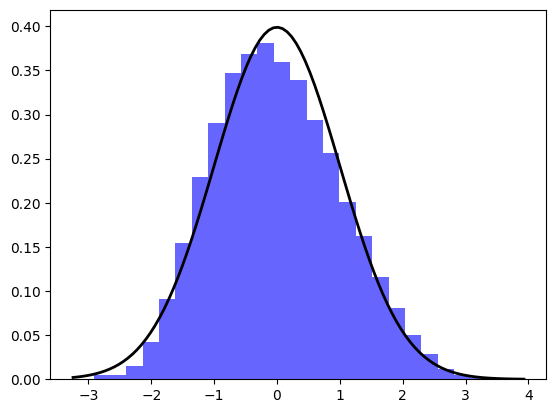

In [31]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

data = interest_data['Z_SCORE_NOTA'].to_numpy()

mu, std = norm.fit(data) 
  
# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
  
plt.show()

## Generate histograms by grade

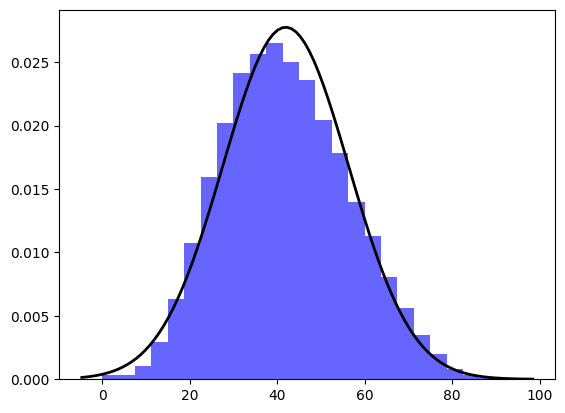

In [32]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

data = interest_data['NOTA_GERAL'].to_numpy()

mu, std = norm.fit(data) 
  
# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
  
plt.show()

## Filter by grades far above or far below average

In [33]:
filtered_interest_data = interest_data.query("Z_SCORE_NOTA > 2.00 or Z_SCORE_NOTA < -2.00")
filtered_interest_data.count()

no_categoria_administrativa_ies    17137
no_organizacao_academica_ies       17137
no_regiao_ies                      17137
no_grau_academico                  17137
no_modalidade                      17137
faixa_etaria                       17137
tp_sexo                            17137
no_pres                            17137
nt_ger                             17137
q1                                 17137
q2                                 17137
q4                                 17137
q5                                 17137
q8                                 17137
q9                                 17137
q10                                17137
q15                                17137
q17                                17137
q21                                17137
q58                                17137
NOTA_GERAL                         17137
Z_SCORE_NOTA                       17137
CLASSIFICACAO_NOTA                 17137
dtype: int64

In [34]:
analysis_interest_columns = [
    'CLASSIFICACAO_NOTA',
    'no_categoria_administrativa_ies',
    'no_organizacao_academica_ies',
    'no_regiao_ies',
    'no_grau_academico',
    'no_modalidade',
    'faixa_etaria',
    'tp_sexo',
    'no_pres',
    'nt_ger',
    'q1', # Estado civil
    'q2', # Cor ou raça
    'q4', # Escolaridade do pai
    'q5', # Escolaridade da mãe
    'q8', # Renda total da família
    'q9', # Situação financeira
    'q10', # Situação de trabalho
    'q15', # Entrou por alguma política afirmativa?
    'q17', # Em que tipo de escola cursou o EM?
    'q21', # Alguém da família concluiu ensino superior?
    'q58', # Docentes utilizaram TICs como estratégia de ensino?
]

analysis_interest_data = filtered_interest_data[analysis_interest_columns]

## Save a CSV file with the analysis interest data

In [35]:
import os  

os.makedirs('analysis_interest_data', exist_ok=True)  
analysis_interest_data.to_csv('analysis_interest_data/analysis-interest-data-2018.csv')

analysis_file_data = pd.read_csv('analysis_interest_data/analysis-interest-data-2018.csv', sep=',', encoding='UTF-8')
analysis_file_data.head()

,Unnamed: 0,CLASSIFICACAO_NOTA,no_categoria_administrativa_ies,no_organizacao_academica_ies,no_regiao_ies,no_grau_academico,no_modalidade,faixa_etaria,tp_sexo,no_pres,...,q2,q4,q5,q8,q9,q10,q15,q17,q21,q58
0,85924,NOTA: MUITO ACIMA DA MÉDIA,Pública Federal,Universidade,Norte,Bacharelado,EaD,Entre 50 e 57 anos,Masculino,Presente com resultado válido,...,Parda,Pai: Ensino Fundamental I,Mãe: Ensino Médio,Classe Social E,Tenho renda e não preciso de ajuda,Trabalho de 21 a 39 horas semanais,Não entrei por cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo
1,86099,NOTA: MUITO ACIMA DA MÉDIA,Privada com fins lucrativos,Centro Universitário,Norte,Bacharelado,EaD,Entre 34 e 41 anos,Masculino,Presente com resultado válido,...,Parda,Pai: Ensino Médio,Mãe: Ensino Superior - Graduação,Classe Social C,Tenho renda e contribuo com o sustento da família,Trabalho 40 horas semanais ou mais,Não entrei por cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo totalmente
2,86118,NOTA: MUITO ABAIXO DA MÉDIA,Privada com fins lucrativos,Centro Universitário,Norte,Bacharelado,EaD,Entre 42 e 49 anos,Feminino,Presente com resultado válido,...,Parda,Pai: Ensino Fundamental I,Mãe: Ensino Fundamental I,Classe Social E,Tenho renda e contribuo com o sustento da família,Trabalho 40 horas semanais ou mais,Não entrei por cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo totalmente
3,86225,NOTA: MUITO ABAIXO DA MÉDIA,Privada com fins lucrativos,Centro Universitário,Norte,Bacharelado,EaD,Entre 42 e 49 anos,Feminino,Presente com resultado válido,...,Parda,Pai: Ensino Fundamental I,Mãe: Ensino Fundamental I,Classe Social C,"Sem renda, financiado por familiares ou outros",Não estou trabalhando,Não entrei por cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo totalmente
4,86267,NOTA: MUITO ABAIXO DA MÉDIA,Pública Federal,Universidade,Norte,Bacharelado,EaD,Entre 26 e 33 anos,Feminino,Presente com resultado válido,...,Parda,Pai: Ensino Médio,Mãe: Ensino Médio,Classe Social E,"Sem renda, financiado por familiares ou outros",Não estou trabalhando,Não entrei por cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo


## Convert table to transactions

In [36]:
transactions = analysis_interest_data.to_numpy()
transactions

array([['NOTA: MUITO ACIMA DA MÉDIA', 'Pública Federal', 'Universidade',
        ..., 'EM: Todo em escola pública',
        'Tenho familiar com graduação', 'IE Usou TICs: Concordo'],
       ['NOTA: MUITO ACIMA DA MÉDIA', 'Privada com fins lucrativos',
        'Centro Universitário', ..., 'EM: Todo em escola pública',
        'Tenho familiar com graduação',
        'IE Usou TICs: Concordo totalmente'],
       ['NOTA: MUITO ABAIXO DA MÉDIA', 'Privada com fins lucrativos',
        'Centro Universitário', ..., 'EM: Todo em escola pública',
        'Tenho familiar com graduação',
        'IE Usou TICs: Concordo totalmente'],
       ...,
       ['NOTA: MUITO ACIMA DA MÉDIA', 'Pública Federal',
        'Instituto Federal de Educação, Ciência e Tecnologia', ...,
        'EM: Todo em escola pública', 'Tenho familiar com graduação',
        'IE Usou TICs: Concordo parcialmente'],
       ['NOTA: MUITO ABAIXO DA MÉDIA', 'Pública Federal',
        'Instituto Federal de Educação, Ciência e Tecnologi

## Create apriori rules

In [37]:
%run '../scripts/apriori-params-setup.py'
rules = apriori(transactions, min_support=support, min_confidence=confidence)
rules

<generator object apriori at 0x2e18f4a50>

## Run apriori

In [38]:
from datetime import datetime

initial_time = datetime.now()

results = pd.DataFrame(list(rules))

execution_time = datetime.now() - initial_time
print("Time to run apriori: " + str(execution_time))

Time to run apriori: 0:18:45.423379


In [39]:
results

,items,support,ordered_statistics
0,(Bacharelado),0.870748,"[((), (Bacharelado), 0.8707475053976775, 1.0)]"
1,(Branca),0.602673,"[((), (Branca), 0.6026725797980976, 1.0)]"
2,(EM: Todo em escola pública),0.526522,"[((), (EM: Todo em escola pública), 0.52652156..."
3,(Entre 17 e 25 anos),0.548346,"[((), (Entre 17 e 25 anos), 0.5483456847756317..."
4,(Feminino),0.551497,"[((), (Feminino), 0.5514967613934761, 1.0)]"
...,...,...,...
23230,"(NOTA: MUITO ACIMA DA MÉDIA, Entre 17 e 25 ano...",0.102818,"[((Entre 17 e 25 anos, Não estou trabalhando, ..."
23231,"(NOTA: MUITO ACIMA DA MÉDIA, Entre 17 e 25 ano...",0.114372,"[((Universidade, Entre 17 e 25 anos, Feminino)..."
23232,"(NOTA: MUITO ACIMA DA MÉDIA, Entre 17 e 25 ano...",0.121025,"[((Não estou trabalhando, Entre 17 e 25 anos, ..."
23233,"(EM: Todo em escola privada (particular), NOTA...",0.110054,"[((Entre 17 e 25 anos, EM: Todo em escola priv..."


## Extract results to a new table

In [40]:
from datetime import datetime

initial_time = datetime.now()

%run '../scripts/extractor.py'

organized_rules = extractor(results)

execution_time = datetime.now() - initial_time
print("Time to run extractor: " + str(execution_time))

organized_rules

Time to run extractor: 0:00:06.967743


,items_base,items_add,support,confidence,lift
0,[],[Bacharelado],0.870748,0.870748,1.000000
1,[],[Branca],0.602673,0.602673,1.000000
2,[],[EM: Todo em escola pública],0.526522,0.526522,1.000000
3,[],[Entre 17 e 25 anos],0.548346,0.548346,1.000000
4,[],[Feminino],0.551497,0.551497,1.000000
...,...,...,...,...,...
582707,"[EM: Todo em escola privada (particular), Bran...",[NOTA: MUITO ACIMA DA MÉDIA],0.106728,0.939877,1.296937
582708,"[EM: Todo em escola privada (particular), NOTA...",[Entre 17 e 25 anos],0.106728,0.830609,1.514753
582709,"[NOTA: MUITO ACIMA DA MÉDIA, Branca, Entre 17 ...",[EM: Todo em escola privada (particular)],0.106728,0.762719,1.979212
582710,"[EM: Todo em escola privada (particular), NOTA...",[Branca],0.106728,0.753295,1.249924


In [41]:
rules_count = len(organized_rules.index)
print("Count of itemsets: " + str(len(results.index)))
print("Count of association rules for support " + str((support *100)) + "% and confidence " + str((confidence * 100)) + "%: " + str(rules_count))

Count of itemsets: 23235
Count of association rules for support 10.0% and confidence 50.0%: 582712


## Save results to a new CSV file

In [42]:
import os  

os.makedirs('results', exist_ok=True)  
organized_rules.to_csv('results/organized-associations-2018.csv')  